Подключим библиотеки:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

Откроeм и исправим набор данных:

In [10]:
PATH = ("Mall_Customers.csv")
dataset = pd.read_csv(PATH)
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})


Для построение модели будет построен график зависимости инерции от количества кластеров:

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

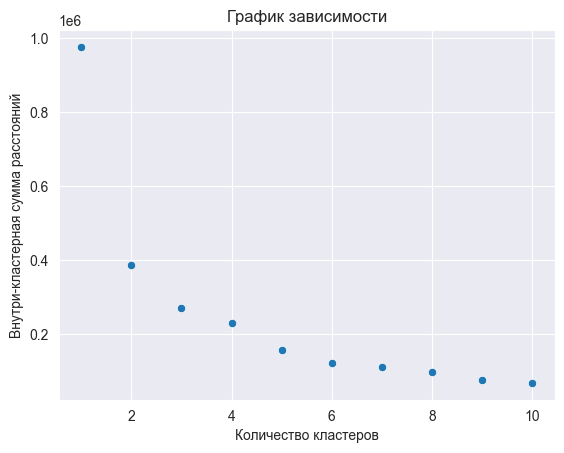

In [11]:
inertia = []

for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++")
    k_means.fit(dataset)
    inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(
    x = [x for x in range(1, 11)],
    y = inertia
)

plt.title("График зависимости")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутри-кластерная сумма расстояний")

Оптимальное количество кластеров, на основе графика - 4. Построим модель, делящую данные на 2 кластера:

In [12]:
CLUSTERS = 4

model = KMeans(
    n_clusters=CLUSTERS
)

model.fit(dataset)

clusters = pd.DataFrame(
    columns=dataset.columns,
    data=model.cluster_centers_
)

clusters["Amount"] = np.unique(
    model.labels_,
    return_counts=True
)[1]

clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Amount
0,31.016393,0.606557,36.918033,30.360656,49.737705,61
1,162.000000,0.538462,32.692308,86.538462,82.128205,39
2,93.531250,0.578125,43.343750,58.125000,49.359375,64
3,164.000000,0.472222,40.805556,87.916667,17.888889,36
